# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data = pd.read_csv('../newrepo/APMAE4990-/data/hw2data.csv')
data = pd.DataFrame(data)
data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017
5,1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,...,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129,9.640786
6,0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,...,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802,4.490042
7,0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,...,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986,-0.657482
8,1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,...,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406,0.073541
9,0.309724,-0.737456,-1.536920,-0.562255,-1.599511,0.824390,2.491486,1.011855,-0.281238,0.016707,...,1.260308,0.332623,2.495995,0.334872,0.244085,-1.081475,-1.671211,1.029452,-0.395552,-13.133014


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [2]:
y = data[['y']]
print(y.head(n=10))

X =data.drop('y',axis=1)
X.head(n=10)

           y
0  -2.663126
1  10.399650
2 -21.762801
3   2.139453
4   0.194017
5   9.640786
6   4.490042
7  -0.657482
8   0.073541
9 -13.133014


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.441033,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.998849,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,1.342622,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.140811,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-0.340560,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599
5,1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,...,-0.277940,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129
6,0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,...,-1.468367,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802
7,0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,...,-0.339033,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986
8,1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,...,-0.573367,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406
9,0.309724,-0.737456,-1.536920,-0.562255,-1.599511,0.824390,2.491486,1.011855,-0.281238,0.016707,...,0.193950,1.260308,0.332623,2.495995,0.334872,0.244085,-1.081475,-1.671211,1.029452,-0.395552


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [3]:
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

X_train = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]

alphas = np.logspace(-8,-3,1000)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))

best_alpha_index = np.argmax(scores)
print 'The optimazed alpha is ', alphas[best_alpha_index]

/Users/lingxiangyu/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The optimazed alpha is  0.000767158117678


d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

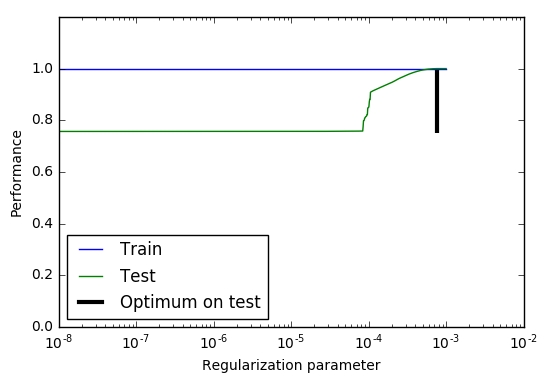

In [4]:
train_error = []
test_error = []

for alpha in alphas:
    regr1 = Lasso(alpha=alpha)
    regr1.fit(X_train, y_train)
    train_error.append(regr1.score(X_train, y_train))
    test_error.append(regr1.score(X_test, y_test))
    
best_alpha2_index = np.argmax(test_error)
best_alpha2 = alphas[best_alpha2_index]

#plt.subplot(2, 1, 1)

plt.semilogx(alphas, train_error, label='Train')
plt.semilogx(alphas, test_error, label='Test')
plt.vlines(best_alpha2, plt.ylim()[0], np.max(test_error), color='k',linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlim([10^-9,0.01])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

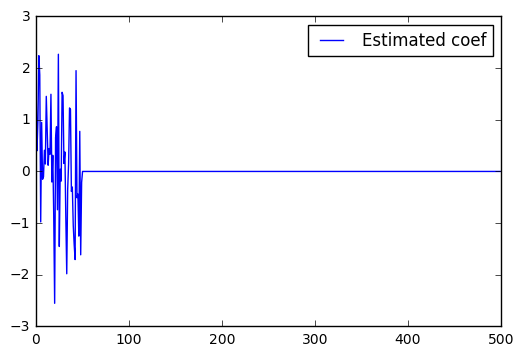

In [5]:
regre2 = Lasso(alpha=best_alpha2)
coeff = regre2.fit(X,y).coef_
plt.plot(coeff, label='Estimated coef')
plt.legend()


ANS: I think there are not many significant optimal paramters so many paramters' coefficinents are zero.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

[ 0.99932035  0.99997757  0.99999795  0.99999462  0.99999295]


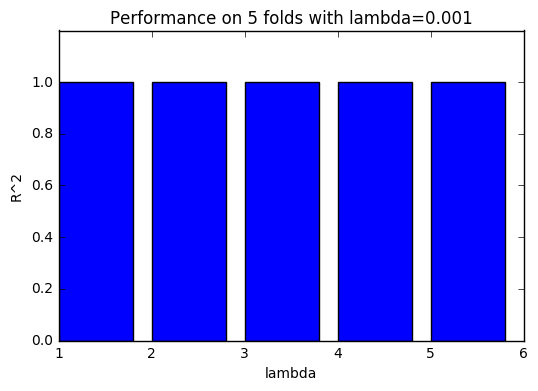

In [6]:
from sklearn.model_selection import cross_val_score
scores1 = []
regre3 = Lasso(alpha=best_alpha2)  #best_alpha2 is from part d
scores1 = cross_val_score(regre3, X, y, cv=5)
print(scores1)

plt.xlabel('lambda')
plt.ylabel('R^2')
plt.ylim([0,1.2])
plt.title('Performance on 5 folds with lambda=' + str(alpha))
plt.bar(range(1,6),scores1)
plt.show()

regre3
type(np.array(X_test))
type(np.array(best_alpha2))

X_scaled = X.as_matrix().astype(np.float)
X_scaled

X_scaled2 = scaler.fit_transform(X_scaled)
X_scaled2

v = X_scaled - X_scaled2
v
y.shape

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [8]:
y=y.reset_index() #somtimes it's good to reset index!!!

In [61]:
#from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    #kf = KFold(n_splits=5, random_state=None, shuffle=True)
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    #for train_index, test_index in kf.split(X):
    for train_index, test_index in kf:   
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        #X_test_temp = np.array(X_test)
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
#X_scaled = scaler.fit_transform(X)
X_scaled2 = scaler.fit_transform(X_scaled)
clf0 = Lasso(best_alpha2)
clf0.fit(X_train,y_train)

coeffs=run_cv_coeffs(X_scaled2,np.array(y),Lasso,alpha=best_alpha2)

In [68]:
def get_coeffs(coeffs):
    coeffs_avg = [(coeffs[0][0][i]+coeffs[0][1][i]+coeffs[1][0][i]+coeffs[1][1][i]+coeffs[2][0][i]+coeffs[2][1][i]+coeffs[3][0][i]+coeffs[3][1][i]+coeffs[4][0][i]+coeffs[4][1][i])/10  for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][0][i]+coeffs[0][1][i]+coeffs[1][0][i]+coeffs[1][1][i]+coeffs[2][0][i]+coeffs[2][1][i]+coeffs[3][0][i]+coeffs[3][1][i]+coeffs[4][0][i]+coeffs[4][1][i]]) for i in range(0,len(X.columns))]
    return coeffs_avg, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

/Users/lingxiangyu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


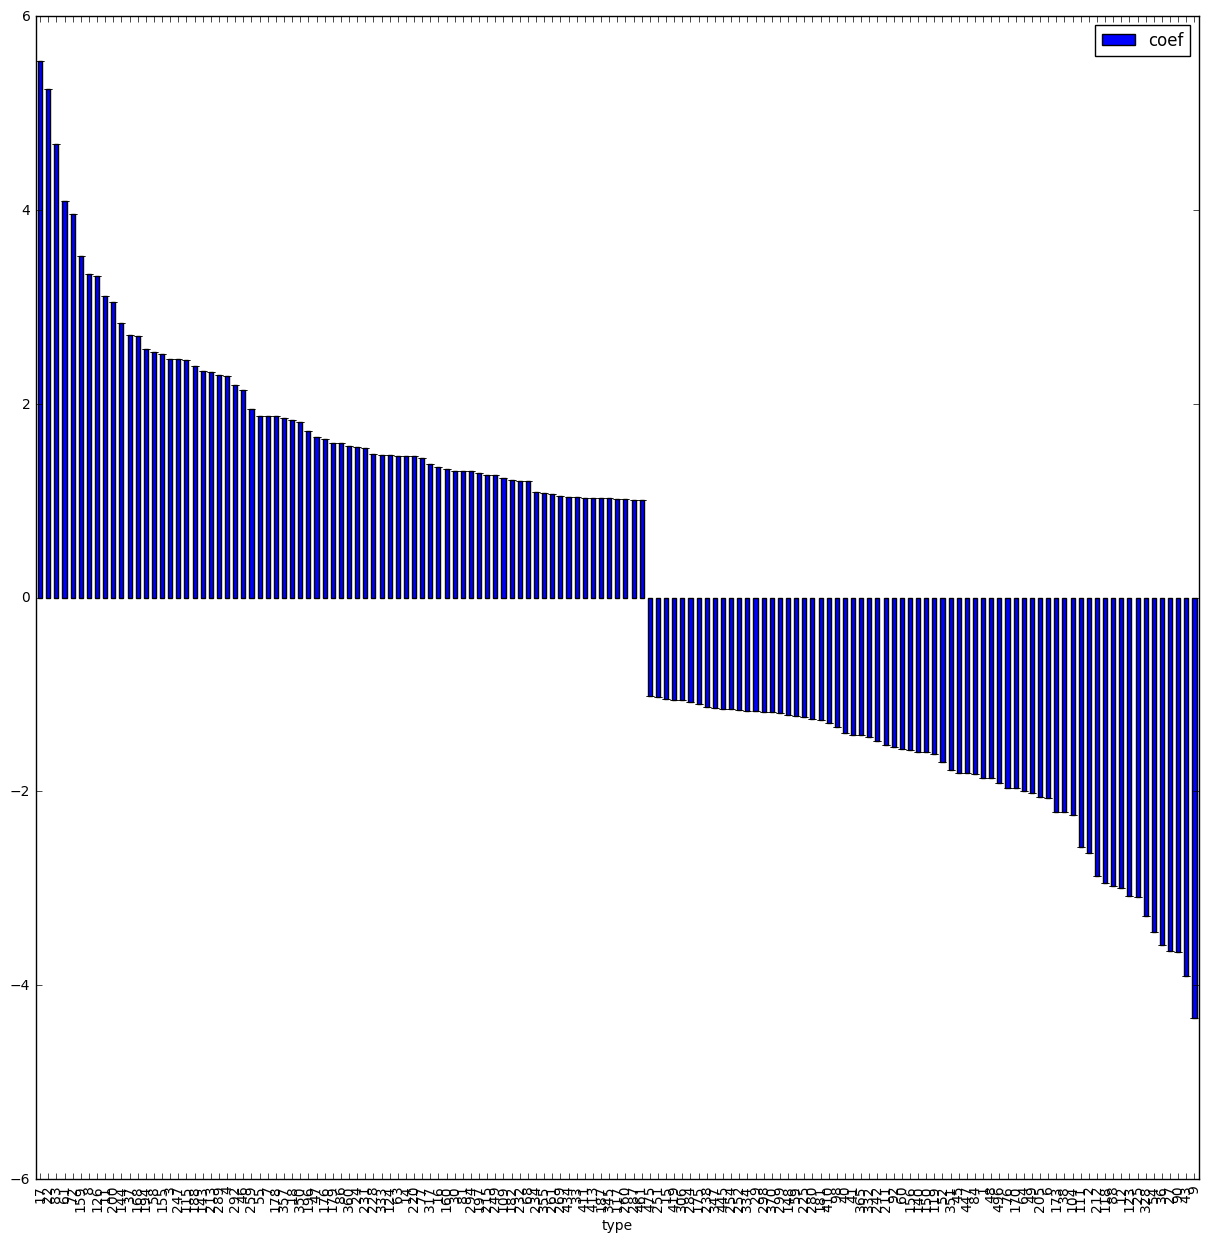

In [69]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))